Exercise: train and fine-tune a Decision Tree for the moons dataset.

In [1]:
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np

In [2]:
X, y=make_moons(n_samples=10000, shuffle=True, noise=0.4, random_state=42)

In [3]:
print(X)

[[ 0.9402914   0.12230559]
 [ 0.12454026 -0.42477546]
 [ 0.26198823  0.50841438]
 ...
 [-0.24177973  0.20957199]
 [ 0.90679645  0.54958215]
 [ 2.08837082 -0.05050728]]


In [4]:
print(y)

[1 0 0 ... 1 0 1]


In [5]:
# We store both the data and target in a dataframe to ease plotting

moons = pd.DataFrame(np.concatenate([X, y[:, np.newaxis]], axis=1), columns = ["coord1", "coord2", "label"])

In [6]:
moons.head()

,coord1,coord2,label
0,0.940291,0.122306,1.0
1,0.124540,-0.424775,0.0
2,0.261988,0.508414,0.0
3,-0.495238,0.072589,0.0
4,-0.879413,0.549373,0.0


In [7]:
moons.describe()

,coord1,coord2,label
count,10000.000000,10000.000000,10000.000000
mean,0.504596,0.247833,0.500000
std,0.951356,0.632287,0.500025
min,-2.386711,-1.667158,0.000000
25%,-0.183312,-0.211749,0.000000
50%,0.517442,0.235856,0.500000
75%,1.185141,0.707281,1.000000
max,3.308359,2.225215,1.000000


In [8]:
data_moons = moons.iloc[:, 0:2]

In [9]:
target_moons = moons["label"]

<AxesSubplot:xlabel='coord1', ylabel='coord2'>

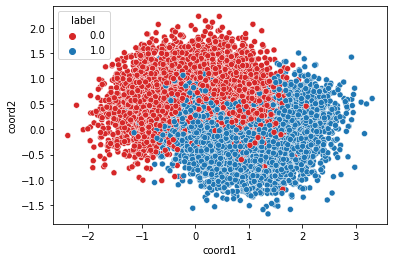

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='coord1', y='coord2', data=moons, hue='label', palette=["tab:red", "tab:blue"])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_moons, target_moons, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Use grid search with cross-validation (with the help of the GridSearchCV class) to find good hyperparameter values for a DecisionTreeClassifier

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth': [2, 3, 4, 6, 10, 16, 20], 'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], }

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=6, verbose=2)
grid_search_cv.fit(X_train, y_train)

Fitting 6 folds for each of 2058 candidates, totalling 12348 fits
[CV] max_depth=2, max_leaf_nodes=2, min_samples_split=2 ..............
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_split=2 ..............
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_split=2 ..............
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_split=2 ..............
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_split=2 ..............
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_split=2 ..............
[CV]  max_depth=2, max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=2, min_samples_split=3 ..............
[CV] 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=2, max_leaf_nodes=3, min_samples_split=4, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=3, min_samples_split=4 ..............
[CV]  max_depth=2, max_leaf_nodes=3, min_samples_split=4, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=3, min_samples_split=4 ..............
[CV]  max_depth=2, max_leaf_nodes=3, min_samples_split=4, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=3, min_samples_split=4 ..............
[CV]  max_depth=2, max_leaf_nodes=3, min_samples_split=4, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=3, min_samples_split=4 ..............
[CV]  max_depth=2, max_leaf_nodes=3, min_samples_split=4, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=3, min_samples_split=4 ..............
[CV]  max_depth=2, max_leaf_nodes=3, min_samples_split=4, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=4, min_samples_split=2 ..............
[CV]  max_depth=2, max_leaf_nodes=4, min_samples_split=2, total=   0.0s
[CV] max_depth=2, max_leaf_nodes=4, min_samples_split=2 ..............

[Parallel(n_jobs=1)]: Done 12348 out of 12348 | elapsed:  1.9min finished


GridSearchCV(cv=6, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 6, 10, 16, 20],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=2)

In [14]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=33, random_state=42)

In [15]:
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=33, random_state=42)
tree = tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8735


Grow a forest.

In [16]:
# generate 1,000 subsets of the training set, each containing 100 instances selected randomly. 

#from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

minisets = []

for i in range(1000):
    minisets.append(moons.sample(n=100))

minisets[0]


,coord1,coord2,label
9119,-0.027410,-0.680599,1.0
2957,-0.642777,1.302845,0.0
1444,0.567019,0.194127,0.0
8454,0.124707,1.173689,0.0
1775,-0.561622,0.606972,0.0
...,...,...,...
240,1.506642,-0.841721,1.0
2413,0.567868,-0.949599,1.0
1816,-0.598670,0.585835,0.0
6363,2.705317,0.872208,1.0


In [17]:
minisets[1]

,coord1,coord2,label
1979,-1.103579,1.178699,0.0
9757,0.684819,0.140207,0.0
5581,2.120141,-0.868484,1.0
9249,-0.179254,1.210630,0.0
7015,1.785249,0.667938,1.0
...,...,...,...
1197,0.334108,1.620042,0.0
370,-0.634072,-0.303777,0.0
711,0.671719,0.586517,0.0
3202,1.452296,0.519543,1.0


In [18]:
len(minisets)

1000

In [19]:
moons.describe()

,coord1,coord2,label
count,10000.000000,10000.000000,10000.000000
mean,0.504596,0.247833,0.500000
std,0.951356,0.632287,0.500025
min,-2.386711,-1.667158,0.000000
25%,-0.183312,-0.211749,0.000000
50%,0.517442,0.235856,0.500000
75%,1.185141,0.707281,1.000000
max,3.308359,2.225215,1.000000


In [20]:
from sklearn.base import clone

#forest = [clone(grid_search_cv.best_estimator_) for _ in range (n_trees)]

accuracy_scores = []
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for i in range(n_trees):
    dataset = minisets[i]
    tree = clone(grid_search_cv.best_estimator_)
    target = dataset["label"]
    features = dataset.iloc[:, 0:2]
    
    # polosuj indexy np. z 1000 
    
    tree.fit(X_train, y_train)
    
    y_pred = tree.predict(X_test)
    Y_pred[i] = y_pred
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8735

In [21]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)
y_pred_majority_votes

array([[1, 1, 0, ..., 0, 0, 1]], dtype=uint8)

In [22]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.8735

In [23]:
y_test.head()

6252    1.0
4684    1.0
1731    0.0
4742    1.0
4521    0.0
Name: label, dtype: float64

In [24]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8525
